6351071049_Lab2_Bài 6(27)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mushrooms.csv to mushrooms (1).csv


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0])
print("Dữ liệu ban đầu:", data.shape)
data.head()


Dữ liệu ban đầu: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 4: Tách features và labels")

X = data.drop(columns=["class"])
y = data["class"]

print("Features:", X.shape)
print("Labels:", y.shape)


Trần Khôi Nguyên_6351071049 - Câu 4: Tách features và labels
Features: (8124, 22)
Labels: (8124,)


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 5: One-hot encoding cho toàn bộ thuộc tính")

X = pd.get_dummies(X)

print("Kích thước dữ liệu sau One-hot:", X.shape)


Trần Khôi Nguyên_6351071049 - Câu 5: One-hot encoding cho toàn bộ thuộc tính
Kích thước dữ liệu sau One-hot: (8124, 117)


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 6: Chia dữ liệu train/test 70-30")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape,  y_test.shape)


Trần Khôi Nguyên_6351071049 - Câu 6: Chia dữ liệu train/test 70-30
Train: (5686, 117) (5686,)
Test : (2438, 117) (2438,)


Trần Khôi Nguyên_6351071049 - Câu 7: Mô hình ID3 (entropy)
Accuracy ID3: 1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



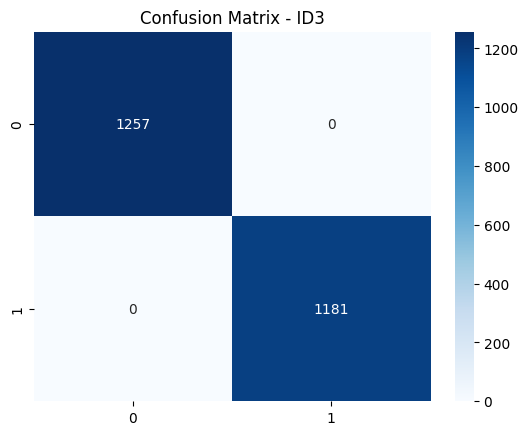

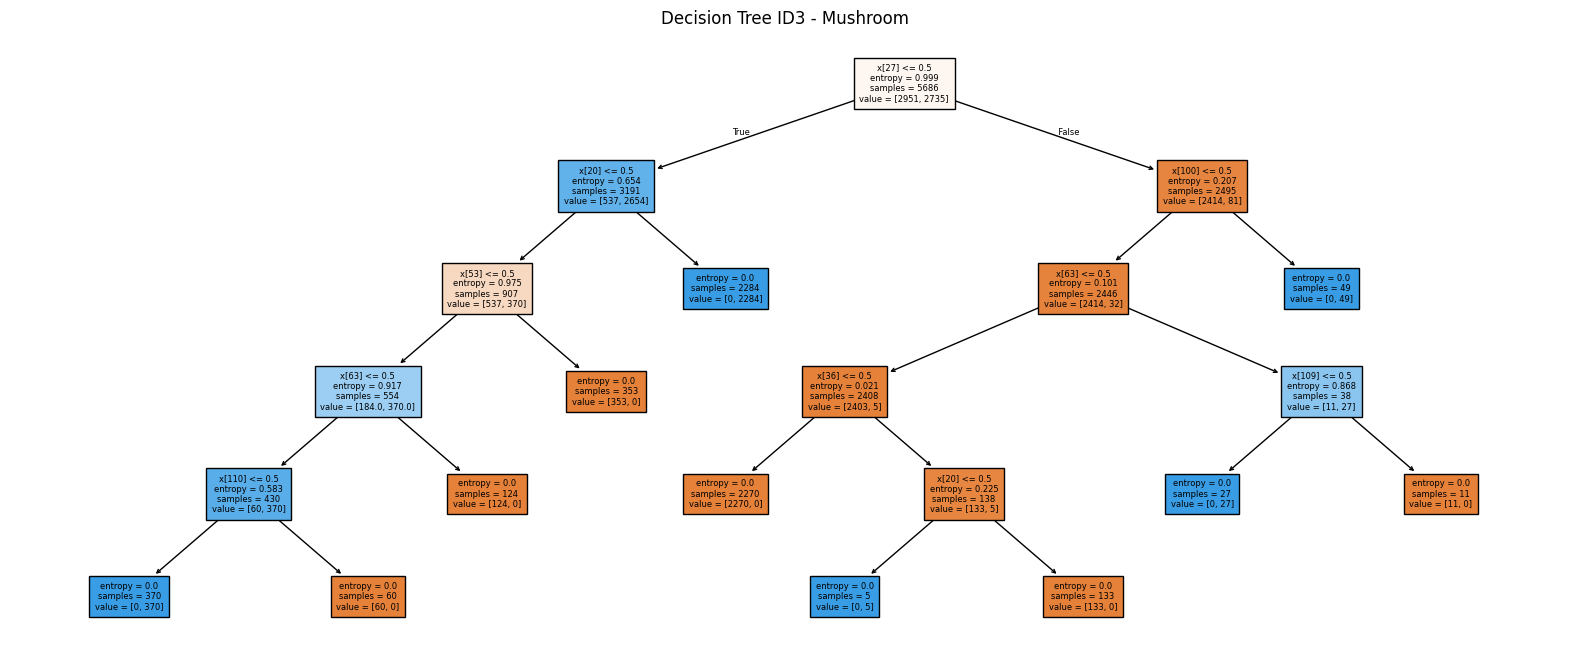

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 7: Mô hình ID3 (entropy)")

id3 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
id3.fit(X_train, y_train)

y_pred_id3 = id3.predict(X_test)

print("Accuracy ID3:", accuracy_score(y_test, y_pred_id3))
print(classification_report(y_test, y_pred_id3))

cm = confusion_matrix(y_test, y_pred_id3)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - ID3")
plt.show()

plt.figure(figsize=(20,8))
plot_tree(id3, filled=True, fontsize=6)
plt.title("Decision Tree ID3 - Mushroom")
plt.show()


Trần Khôi Nguyên_6351071049 - Câu 8: Mô hình CART (gini)
Accuracy CART: 0.9995898277276456
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



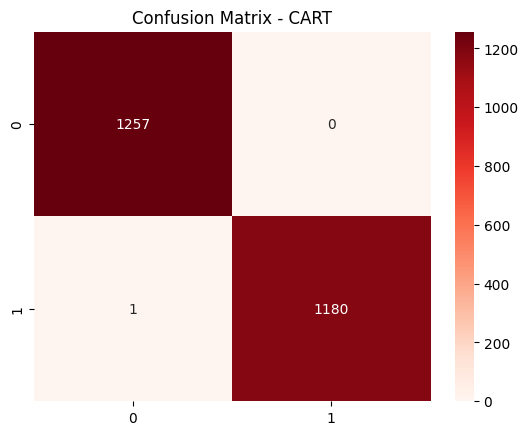

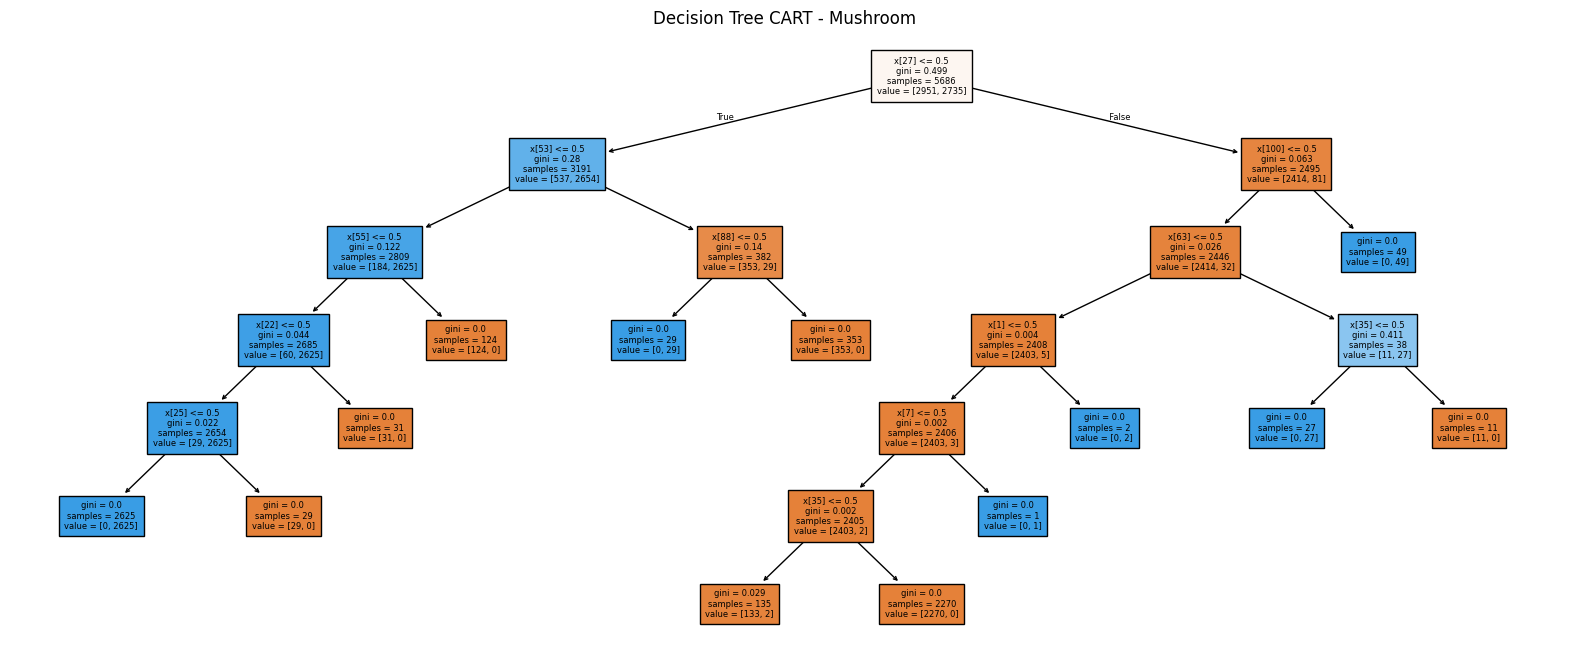

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 8: Mô hình CART (gini)")

cart = DecisionTreeClassifier(criterion="gini", max_depth=6)
cart.fit(X_train, y_train)

y_pred_cart = cart.predict(X_test)

print("Accuracy CART:", accuracy_score(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))

cm = confusion_matrix(y_test, y_pred_cart)
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix - CART")
plt.show()

plt.figure(figsize=(20,8))
plot_tree(cart, filled=True, fontsize=6)
plt.title("Decision Tree CART - Mushroom")
plt.show()


Trần Khôi Nguyên_6351071049 - Câu 9: Mô hình Naive Bayes
Accuracy NB: 0.9643150123051681
              precision    recall  f1-score   support

           e       1.00      0.93      0.96      1257
           p       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



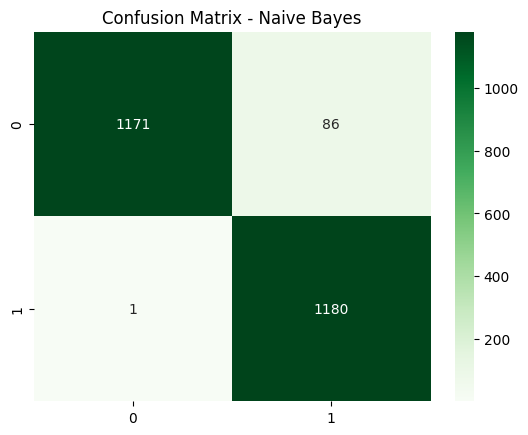

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 9: Mô hình Naive Bayes")

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Accuracy NB:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 10: So sánh mô hình")

print("Accuracy ID3 :", accuracy_score(y_test, y_pred_id3))
print("Accuracy CART:", accuracy_score(y_test, y_pred_cart))
print("Accuracy NB  :", accuracy_score(y_test, y_pred_nb))

print("""
Nhận xét:
- CART & ID3 thường đạt độ chính xác rất cao vì bộ Mushroom rất rõ ràng.
- Naive Bayes thường cho kết quả thấp hơn vì dữ liệu không độc lập giữa các thuộc tính.
- Mô hình tốt nhất thường là CART.
""")


Trần Khôi Nguyên_6351071049 - Câu 10: So sánh mô hình
Accuracy ID3 : 1.0
Accuracy CART: 0.9995898277276456
Accuracy NB  : 0.9643150123051681

Nhận xét:
- CART & ID3 thường đạt độ chính xác rất cao vì bộ Mushroom rất rõ ràng.
- Naive Bayes thường cho kết quả thấp hơn vì dữ liệu không độc lập giữa các thuộc tính.
- Mô hình tốt nhất thường là CART.

